In [53]:
import os, cv2, random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
%matplotlib inline 

from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Conv2D, MaxPooling2D, Dense, Activation
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils
from keras import backend
backend.set_image_dim_ordering('th')

In [54]:
TRAIN_DIR = 'Folder/multitrain/'
TEST_DIR = 'Folder/test/'

ROWS = 100
COLS = 100
CHANNELS = 3

train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)] 
train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if '.DS_Store' not in i] # use this for full dataset

train_apples =    [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'apple_red' in i]
train_gapples = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'apple_green' in i]
train_bananas =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'banana' in i]
train_oranges =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'orange' in i]
train_dates =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'date' in i]
train_lemones =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'lemon' in i]
train_lychees =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'lychee' in i]
train_grapes =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'grape' in i]
#train_others =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'other' in i]

test_images =  [TEST_DIR+i for i in os.listdir(TEST_DIR)if '.DS_Store' not in i]


# slice datasets for memory efficiency on Kaggle Kernels, delete if using full dataset
train_images = train_apples[:510] + train_gapples[:450] +train_bananas[:450] + train_oranges[:450] + train_dates[:450] + train_lemones[:450]+ train_lychees[:450] + train_grapes[:450] 
#+ train_others[:150]
random.shuffle(train_images)
#test_images =  test_images[:100]
test_images =  test_images[:93]


def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR) #cv2.IMREAD_GRAYSCALE
    img= cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    return cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)


def prep_data(images):
    count = len(images)
    #data = np.ndarray((count, CHANNELS, ROWS, COLS), dtype=np.uint8)
    data = np.ndarray((count, CHANNELS, ROWS, COLS), dtype=np.uint8)

    for i, image_file in enumerate(images):
        image = read_image(image_file)
        data[i] = image.T
        if i%100 == 0: print('Processed {} of {}'.format(i, count))
    
    return data

train = prep_data(train_images)
test = prep_data(test_images)

print("Train shape: {}".format(train.shape))
print("Test shape: {}".format(test.shape))

Processed 0 of 3660
Processed 100 of 3660
Processed 200 of 3660
Processed 300 of 3660
Processed 400 of 3660
Processed 500 of 3660
Processed 600 of 3660
Processed 700 of 3660
Processed 800 of 3660
Processed 900 of 3660
Processed 1000 of 3660
Processed 1100 of 3660
Processed 1200 of 3660
Processed 1300 of 3660
Processed 1400 of 3660
Processed 1500 of 3660
Processed 1600 of 3660
Processed 1700 of 3660
Processed 1800 of 3660
Processed 1900 of 3660
Processed 2000 of 3660
Processed 2100 of 3660
Processed 2200 of 3660
Processed 2300 of 3660
Processed 2400 of 3660
Processed 2500 of 3660
Processed 2600 of 3660
Processed 2700 of 3660
Processed 2800 of 3660
Processed 2900 of 3660
Processed 3000 of 3660
Processed 3100 of 3660
Processed 3200 of 3660
Processed 3300 of 3660
Processed 3400 of 3660
Processed 3500 of 3660
Processed 3600 of 3660
Processed 0 of 93
Train shape: (3660, 3, 100, 100)
Test shape: (93, 3, 100, 100)


Text(0.5,1,'Eight Category')

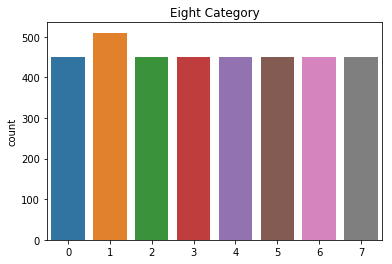

In [55]:
labels = []
for i in train_images:
    if 'apple_red' in i:
        labels.append(1)
    elif 'apple_green' in i:
        labels.append(2)
    elif 'banana' in i:
        labels.append(3)
    elif 'orange' in i:
        labels.append(4)    
 
    elif 'date' in i:
        labels.append(5) 
    elif 'lemon' in i:
        labels.append(6)  
    elif 'lychee' in i:
        labels.append(7)
    #elif 'other' in i:
        #labels.append(8)    
    else:
        labels.append(0)

sns.countplot(labels)
plt.title('Eight Category')

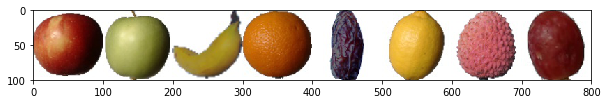

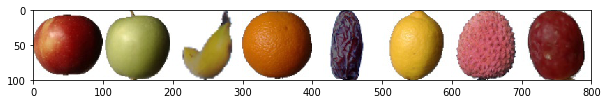

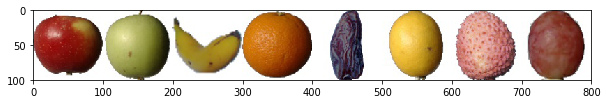

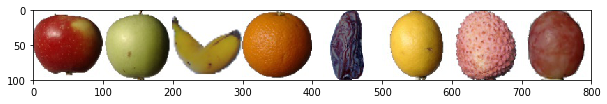

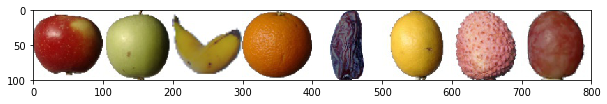

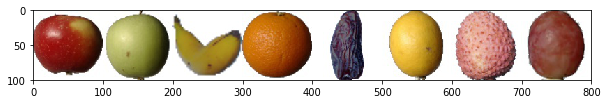

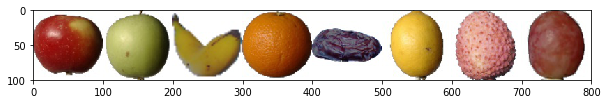

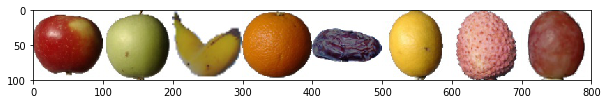

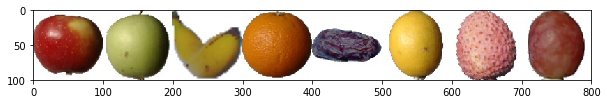

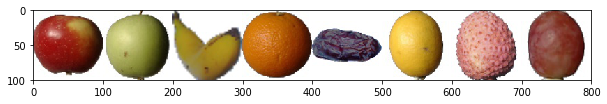

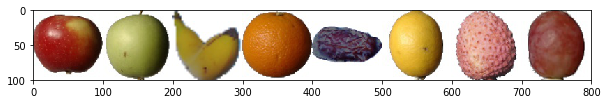

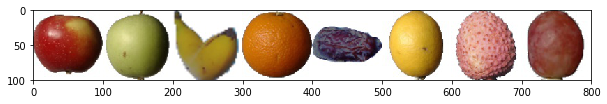

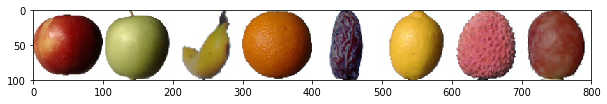

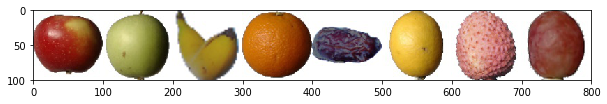

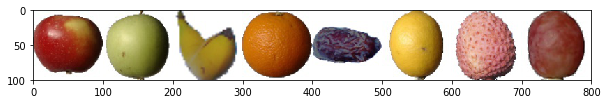

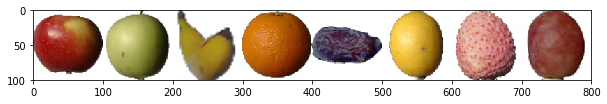

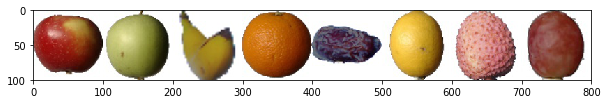

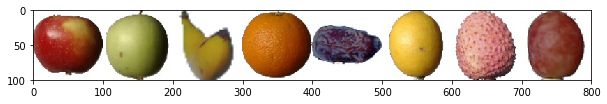

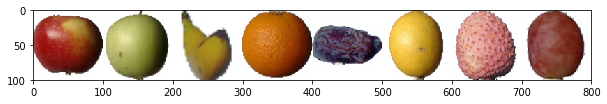

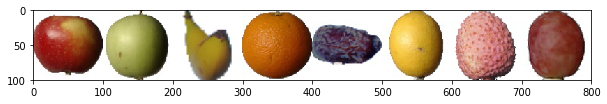

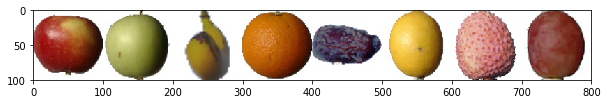

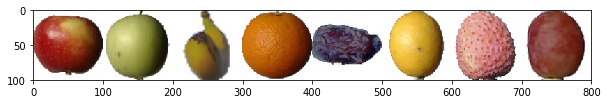

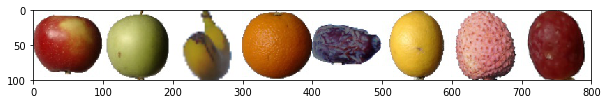

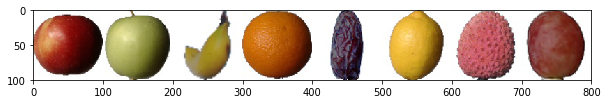

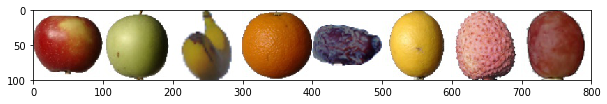

In [56]:
def show_apples_and_peaches(idx):
    apple_red = read_image(train_apples[idx])
    apple_green = read_image(train_gapples[idx])
    banana = read_image(train_bananas[idx])
    orange = read_image(train_oranges[idx])
    date = read_image(train_dates[idx])
    lemon = read_image(train_lemones[idx])
    lychee = read_image(train_lychees[idx])
    graph = read_image(train_grapes[idx])
    #other = read_image(train_others[idx])
    pair = np.concatenate((apple_red, apple_green, banana, orange, date, lemon, lychee, graph), axis=1)
    plt.figure(figsize=(10,8))
    plt.imshow(pair)
    plt.show()
    
for idx in range(0,25):
    show_apples_and_peaches(idx)

Text(0.5,1,' Average Red Apple')

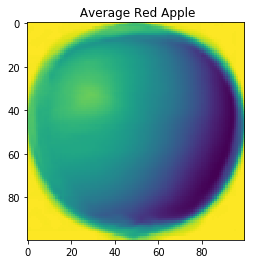

In [57]:
apple_red_avg = np.array([apple_red[0].T for i, apple_red in enumerate(train) if labels[i]==1]).mean(axis=0)
plt.imshow(apple_red_avg)
plt.title(' Average Red Apple')

Text(0.5,1,' Average Green Apple')

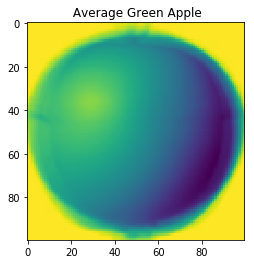

In [58]:
apple_green_avg = np.array([apple_green[0].T for i, apple_green in enumerate(train) if labels[i]==2]).mean(axis=0)
plt.imshow(apple_green_avg)
plt.title(' Average Green Apple')

Text(0.5,1,' Average Banana')

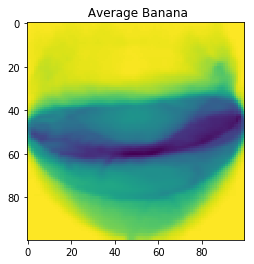

In [59]:
banana_avg = np.array([banana[0].T for i, banana in enumerate(train) if labels[i]==3]).mean(axis=0)
plt.imshow(banana_avg)
plt.title(' Average Banana')

Text(0.5,1,' Average Orange')

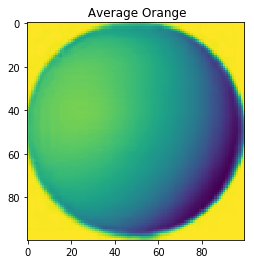

In [60]:
orange_avg = np.array([orange[0].T for i, orange in enumerate(train) if labels[i]==4]).mean(axis=0)
plt.imshow(orange_avg)
plt.title(' Average Orange')

Text(0.5,1,' Average Date')

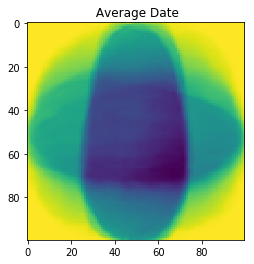

In [61]:
date_avg = np.array([date[0].T for i, date in enumerate(train) if labels[i]==5]).mean(axis=0)
plt.imshow(date_avg)
plt.title(' Average Date')

Text(0.5,1,' Average Lemon')

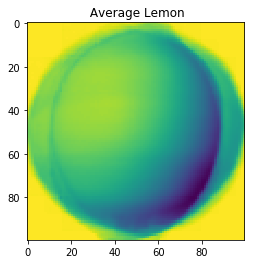

In [62]:
lemon_avg = np.array([lemon[0].T for i, lemon in enumerate(train) if labels[i]==6]).mean(axis=0)
plt.imshow(lemon_avg)
plt.title(' Average Lemon')

Text(0.5,1,' Average Lychee')

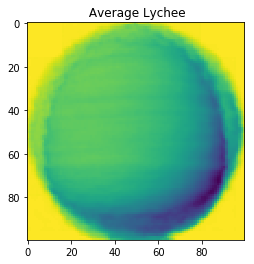

In [63]:
lychee_avg = np.array([lychee[0].T for i, lychee in enumerate(train) if labels[i]==7]).mean(axis=0)
plt.imshow(lychee_avg)
plt.title(' Average Lychee')

Text(0.5,1,' Average Graph')

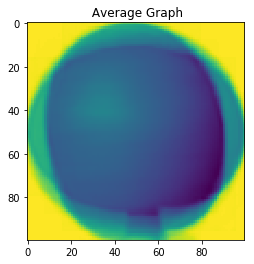

In [64]:
graph_avg = np.array([graph[0].T for i, graph in enumerate(train) if labels[i]==0]).mean(axis=0)
plt.imshow(graph_avg)
plt.title(' Average Graph')

In [65]:
#other_avg = np.array([other[0].T for i, other in enumerate(train) if labels[i]==8]).mean(axis=0)
#plt.imshow(other_avg)
#plt.title(' Average Other')

In [66]:
x_val=np.asarray(train[:10]) 
y_val=np.asarray(labels[:10])
print(x_val)
print(y_val)

[[[[255 255 255 ... 255 255 255]
   [255 255 255 ... 255 255 255]
   [255 255 255 ... 255 255 255]
   ...
   [255 255 255 ... 255 255 255]
   [255 255 255 ... 255 255 255]
   [255 255 255 ... 255 255 255]]

  [[255 255 255 ... 255 255 255]
   [255 255 255 ... 255 255 255]
   [255 255 255 ... 255 255 255]
   ...
   [255 255 255 ... 255 255 255]
   [255 255 255 ... 255 255 255]
   [255 255 255 ... 255 255 255]]

  [[255 255 253 ... 255 255 255]
   [255 255 253 ... 255 255 255]
   [255 255 255 ... 255 255 255]
   ...
   [255 255 255 ... 255 255 255]
   [255 255 255 ... 255 255 255]
   [255 255 255 ... 255 255 255]]]


 [[[255 255 255 ... 255 255 255]
   [255 255 255 ... 255 255 255]
   [255 255 255 ... 255 255 255]
   ...
   [255 255 255 ... 255 255 255]
   [255 255 255 ... 255 255 255]
   [255 255 255 ... 255 255 255]]

  [[255 255 255 ... 255 255 255]
   [255 255 255 ... 255 255 255]
   [255 255 255 ... 255 255 255]
   ...
   [255 255 255 ... 255 255 255]
   [255 255 255 ... 255 255 255

In [67]:
import keras.backend as K
optimizer = RMSprop(lr=1e-4)
objective = 'sparse_categorical_crossentropy'

def f2_score(y_true, y_pred):
    y_true = tf.cast(y_true, "int32")
    y_pred = tf.cast(tf.round(y_pred), "int32") # implicit 0.5 threshold via tf.round
    y_correct = y_true * y_pred
    sum_true = tf.reduce_sum(y_true, axis=1)
    sum_pred = tf.reduce_sum(y_pred, axis=1)
    sum_correct = tf.reduce_sum(y_correct, axis=1)
    precision = sum_correct / sum_pred
    recall = sum_correct / sum_true
    f_score = 5 * precision * recall / (4 * precision + recall)
    f_score = tf.where(tf.is_nan(f_score), tf.zeros_like(f_score), f_score)
    return tf.reduce_mean(f_score)

def f1_score(y_true, y_pred):

    # Count positive samples.
    c1 = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    c2 = K.sum(K.round(K.clip(y_pred, 0, 1)))
    c3 = K.sum(K.round(K.clip(y_true, 0, 1)))

    # If there are no true samples, fix the F1 score at 0.
    if c3 == 0:
        return 0

    # How many selected items are relevant?
    precision = c1 / c2

    # How many relevant items are selected?
    recall = c1 / c3

    # Calculate f1_score
    f1_score = 2 * (precision * recall) / (precision + recall)
    return f1_score

def applepeach():
    
    model = Sequential()

    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(3,ROWS, COLS), activation='relu'))
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),data_format="channels_first"))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),data_format="channels_first"))
    
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),data_format="channels_first"))
    
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
#     model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),data_format="channels_first"))

#     model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
#     model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
#     model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(8))
    model.add(Activation('sigmoid'))

    model.compile(loss=objective, optimizer=optimizer, metrics=['accuracy', f1_score])
    return model


model = applepeach()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 32, 100, 100)      896       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 32, 100, 100)      9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 32, 50, 50)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 64, 50, 50)        18496     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 64, 50, 50)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 64, 25, 25)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 128, 25, 25)       73856     
__________

In [68]:
nb_epoch = 10
batch_size = 16

## Callback for loss logging per epoch
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.val_losses = []
        self.val_f1s = []
        self.val_recalls = []
        self.val_precisions = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.val_f1s.append(logs.get('f1_score'))
        self.val_losses.append(logs.get('val_loss'))
        
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='auto')        
        
def run_applepeach():
    
    history = LossHistory()
    model.fit(train, labels, batch_size=batch_size, epochs=nb_epoch,
              validation_split=0.25, verbose=0, shuffle=True, callbacks=[history, early_stopping],initial_epoch=0)
    predictions = model.predict(test, verbose=0)
    return predictions, history

predictions, history = run_applepeach()
print(predictions)
print(history)

[[2.10106247e-15 1.61577702e-16 9.79951262e-01 1.62158162e-08
  8.34247019e-14 3.23017052e-15 8.12281642e-15 9.33551671e-14]
 [2.57534235e-14 3.95414734e-12 7.81289584e-13 4.93013039e-02
  4.73186290e-12 7.32585867e-13 1.25857163e-03 5.75763361e-11]
 [5.49897280e-11 6.12568468e-11 8.69652084e-09 1.06191912e-07
  2.48234137e-12 2.59458743e-09 3.38719414e-10 9.92123067e-01]
 [3.44845822e-21 7.08737696e-18 4.59525327e-16 7.81790133e-14
  2.33690905e-19 9.99998212e-01 3.98250366e-18 1.18818969e-17]
 [1.91411591e-11 4.79759299e-13 4.13347261e-05 5.12158036e-01
  1.03641943e-12 1.41317730e-11 1.36447234e-12 1.65335468e-10]
 [2.21486885e-14 5.15420595e-10 9.90920186e-01 3.89755624e-11
  1.93436066e-11 2.83889448e-12 1.87000802e-14 5.99553610e-12]
 [3.24189790e-15 9.97117611e-10 9.74981010e-01 9.33064910e-12
  6.75640923e-12 7.84654188e-13 8.84229383e-15 2.23648725e-12]
 [1.19186862e-14 1.01018613e-17 1.26118416e-09 8.82299840e-01
  1.08110468e-16 4.67647578e-16 4.98292542e-13 2.60421906e-14]


In [69]:
y_pred=[]

In [ ]:
score = model.evaluate(train, labels, verbose=0)


In [43]:
print('Test score:', score[0])
print('Test accuracy:', score[1])
print(score)

Test score: 4.836256920116339e-06
Test accuracy: 1.0
[4.836256920116339e-06, 1.0, 0.9346887240957278]


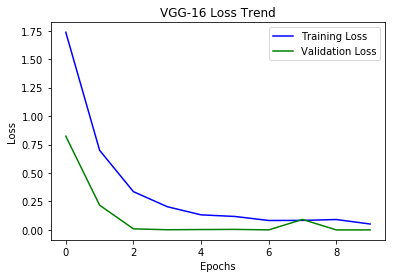

In [44]:
loss = history.losses
val_loss = history.val_losses

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('VGG-16 Loss Trend')
plt.plot(loss, 'blue', label='Training Loss')
plt.plot(val_loss, 'green', label='Validation Loss')
plt.xticks(range(0,nb_epoch)[0::2])
plt.legend()
plt.show()

In [45]:
recall= history.val_recalls
precisions=self.val_precisions = []

NameError: name 'self' is not defined

In [46]:

for i in range(0,93):
    print("next image to test==========="+ str(i))
    print(predictions[i])
    #index_min = np.argmin(predictions[i])
    ind = np.argmax(predictions[i])
    print(ind)

next image to test===========0
[1.80100726e-12 9.01800932e-13 9.68255877e-01 6.54733128e-07
 3.09842158e-13 1.73413714e-12 8.06754930e-09 1.00585235e-10]
2
next image to test===========1
[8.2593420e-12 2.2260404e-11 8.4150414e-10 9.9351257e-01 2.5909674e-09
 5.2118743e-12 3.6274653e-02 7.2725827e-12]
3
next image to test===========2
[1.1899211e-08 3.4693161e-07 2.9299474e-07 9.9687934e-01 3.0288199e-08
 2.2008333e-06 8.6611141e-07 8.5045722e-06]
3
next image to test===========3
[3.16878576e-12 1.42872265e-08 2.76950667e-11 3.20650564e-08
 3.76741254e-13 9.90246892e-01 3.12855915e-13 1.77072121e-10]
5
next image to test===========4
[3.0256875e-10 1.9509885e-09 5.3660037e-06 9.9985397e-01 1.4422741e-10
 5.0336304e-09 5.3634384e-08 1.8032029e-09]
3
next image to test===========5
[5.5742108e-12 1.4353536e-09 9.9999988e-01 5.9488898e-12 1.1794303e-11
 4.3593128e-12 7.6316164e-10 2.6553211e-09]
2
next image to test===========6
[3.9011095e-12 9.3297692e-10 1.0000000e+00 2.8794508e-12 4.357400

testing image============== 0
apple_green
I am 96.83% sure


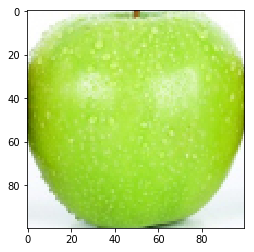

testing image============== 1
Banana
I am 99.35% sure


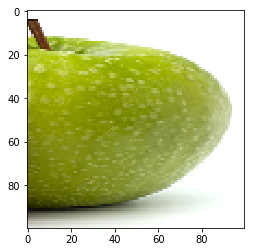

testing image============== 2
Banana
I am 99.69% sure


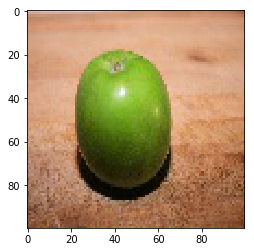

testing image============== 3
date
I am 99.02% sure


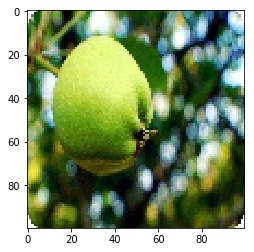

testing image============== 4
Banana
I am 99.99% sure


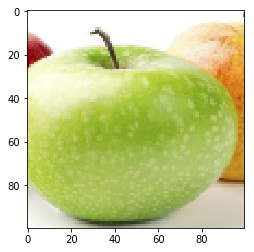

testing image============== 5
apple_green
I am 100.00% sure


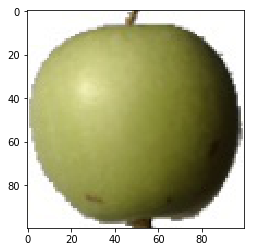

testing image============== 6
apple_green
I am 100.00% sure


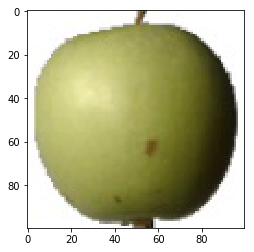

testing image============== 7
Banana
I am 99.94% sure


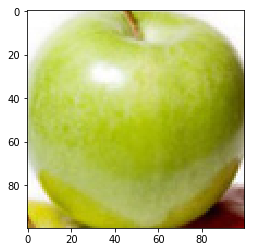

testing image============== 8
apple_green
I am 38.37% sure


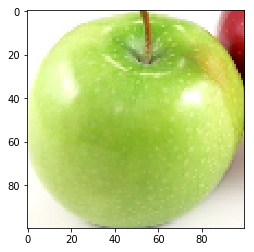

testing image============== 9
graph
I am 0.00% sure


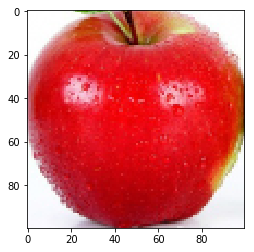

testing image============== 10
graph
I am 81.35% sure


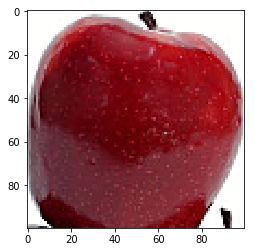

testing image============== 11
apple_red
I am 24.01% sure


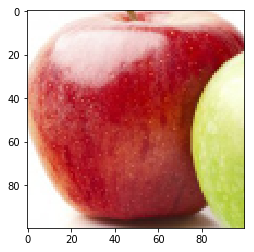

testing image============== 12
apple_red
I am 100.00% sure


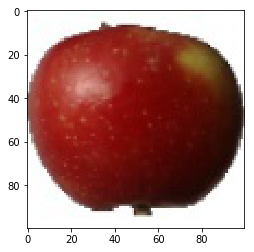

testing image============== 13
graph
I am 0.01% sure


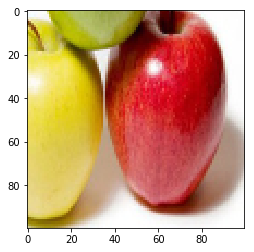

testing image============== 14
Lychee
I am 73.64% sure


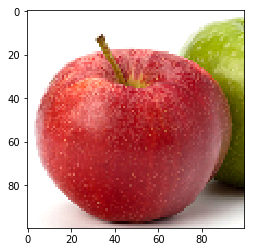

testing image============== 15
Lychee
I am 1.84% sure


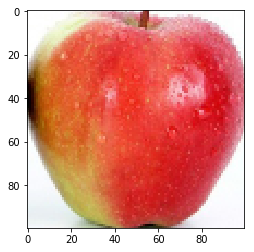

testing image============== 16
apple_red
I am 0.02% sure


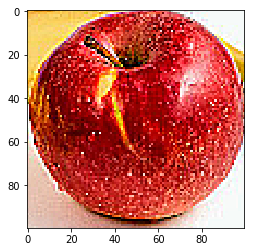

testing image============== 17
apple_red
I am 1.17% sure


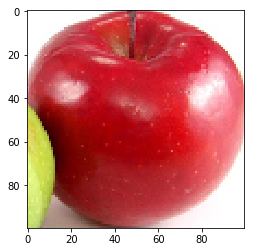

testing image============== 18
Lychee
I am 0.20% sure


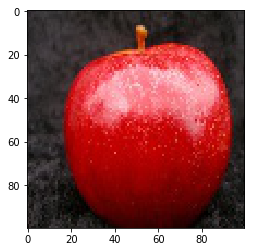

testing image============== 19
date
I am 94.68% sure


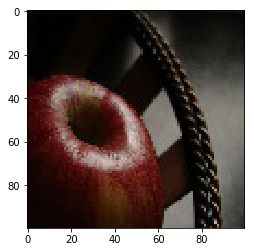

testing image============== 20
Lychee
I am 98.86% sure


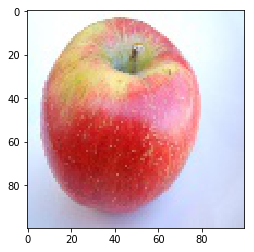

testing image============== 21
apple_red
I am 3.34% sure


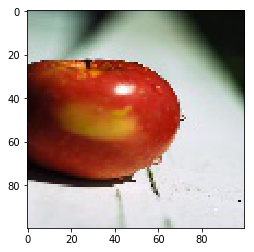

testing image============== 22
date
I am 75.27% sure


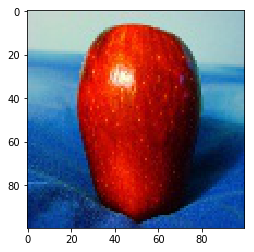

testing image============== 23
apple_red
I am 1.87% sure


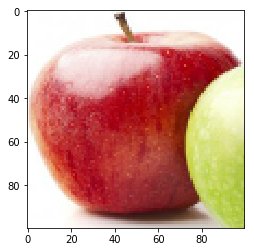

testing image============== 24
Banana
I am 99.98% sure


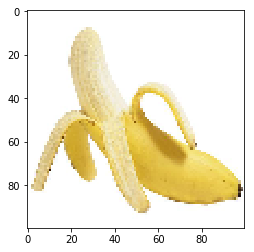

testing image============== 25
Banana
I am 100.00% sure


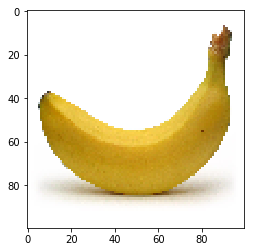

testing image============== 26
Banana
I am 100.00% sure


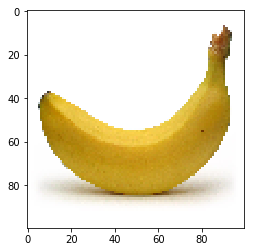

testing image============== 27
Banana
I am 100.00% sure


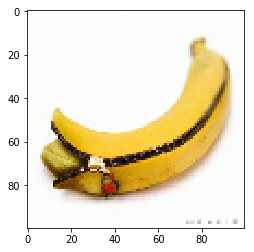

testing image============== 28
Banana
I am 22.39% sure


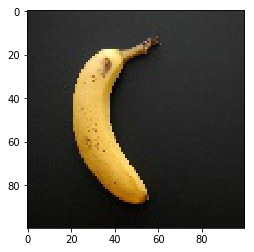

testing image============== 29
Banana
I am 100.00% sure


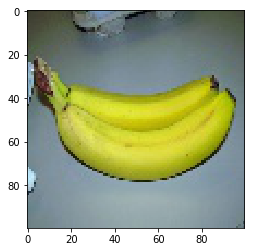

testing image============== 30
date
I am 100.00% sure


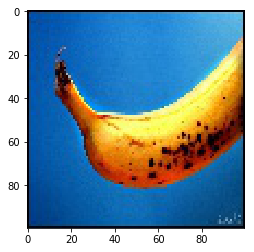

testing image============== 31
Banana
I am 100.00% sure


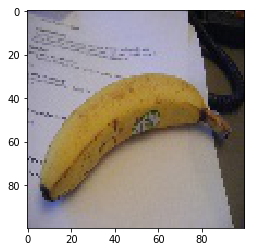

testing image============== 32
Banana
I am 100.00% sure


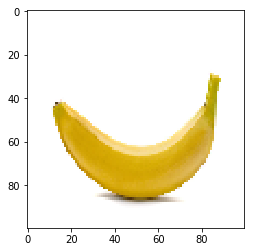

testing image============== 33
Banana
I am 100.00% sure


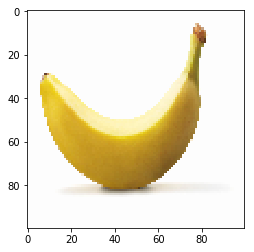

testing image============== 34
Lychee
I am 19.57% sure


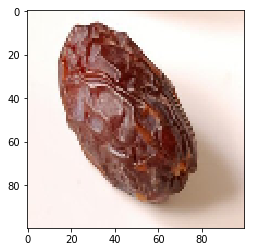

testing image============== 35
date
I am 99.96% sure


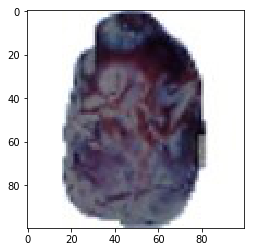

testing image============== 36
date
I am 100.00% sure


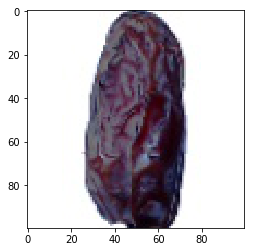

testing image============== 37
date
I am 99.78% sure


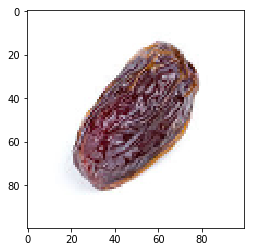

testing image============== 38
date
I am 100.00% sure


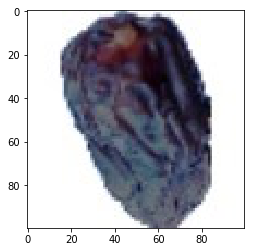

testing image============== 39
date
I am 100.00% sure


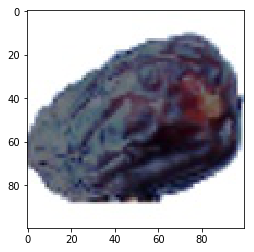

testing image============== 40
Lychee
I am 57.58% sure


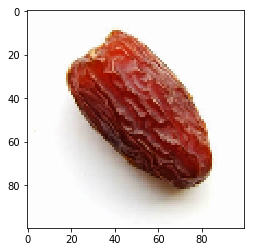

testing image============== 41
date
I am 100.00% sure


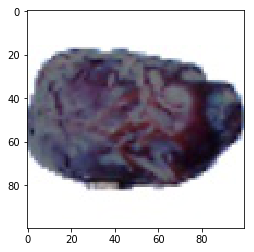

testing image============== 42
Banana
I am 33.50% sure


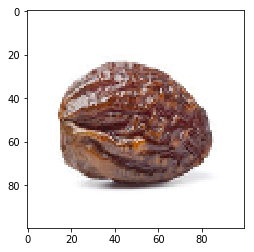

testing image============== 43
date
I am 100.00% sure


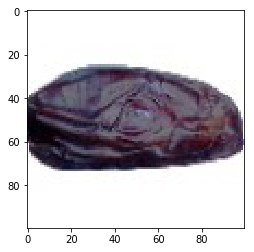

testing image============== 44
date
I am 99.99% sure


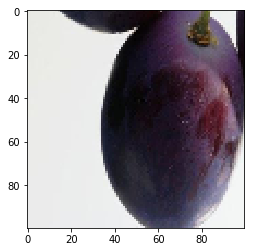

testing image============== 45
apple_red
I am 0.08% sure


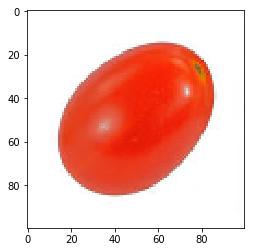

testing image============== 46
apple_red
I am 4.30% sure


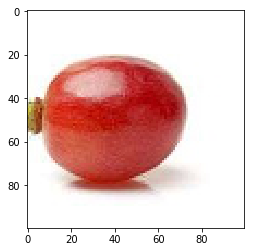

testing image============== 47
Lychee
I am 5.31% sure


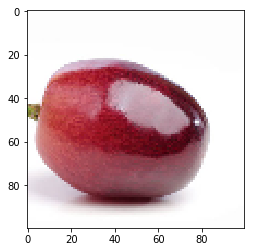

testing image============== 48
graph
I am 16.57% sure


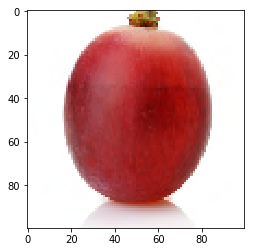

testing image============== 49
graph
I am 13.83% sure


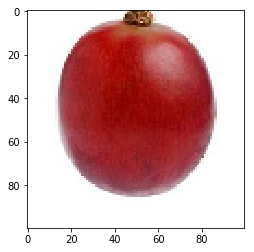

testing image============== 50
date
I am 83.40% sure


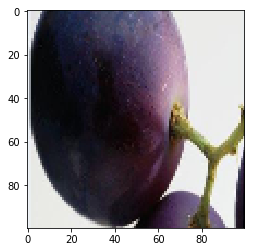

testing image============== 51
graph
I am 0.16% sure


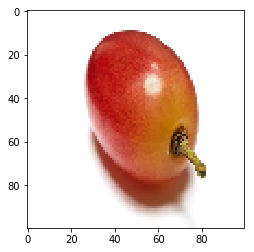

testing image============== 52
Lychee
I am 95.66% sure


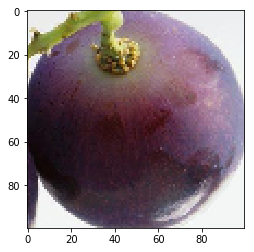

testing image============== 53
Banana
I am 46.49% sure


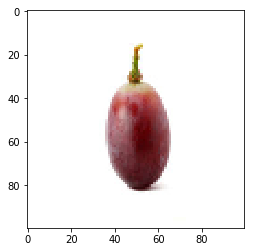

testing image============== 54
apple_red
I am 4.89% sure


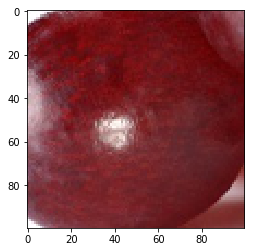

testing image============== 55
date
I am 100.00% sure


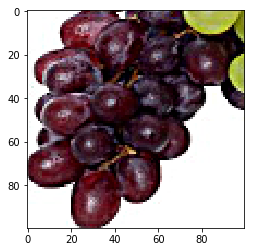

testing image============== 56
Lychee
I am 99.47% sure


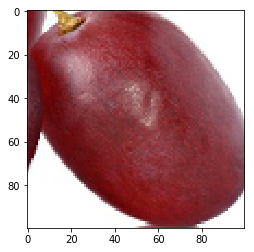

testing image============== 57
graph
I am 89.93% sure


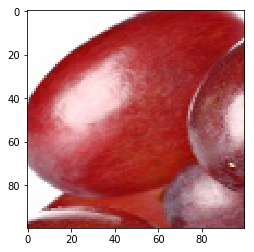

testing image============== 58
Lychee
I am 99.60% sure


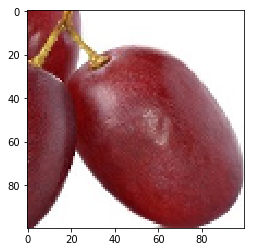

testing image============== 59
graph
I am 100.00% sure


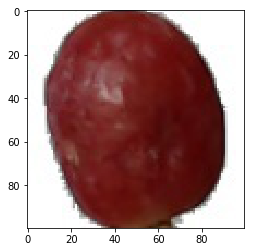

testing image============== 60
graph
I am 100.00% sure


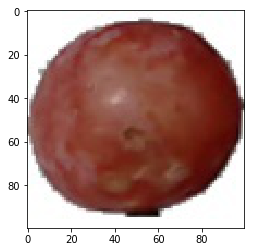

testing image============== 61
Lemon
I am 99.75% sure


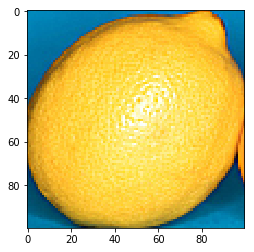

testing image============== 62
Lemon
I am 0.41% sure


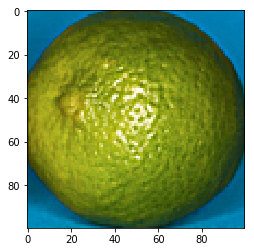

testing image============== 63
Lemon
I am 100.00% sure


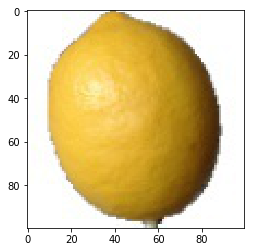

testing image============== 64
Lemon
I am 100.00% sure


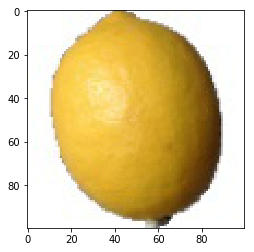

testing image============== 65
Lemon
I am 100.00% sure


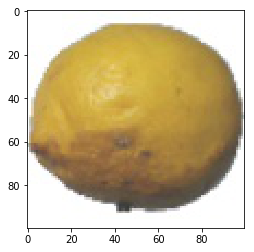

testing image============== 66
Lemon
I am 100.00% sure


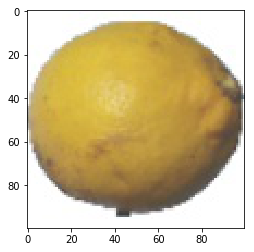

testing image============== 67
Lemon
I am 63.65% sure


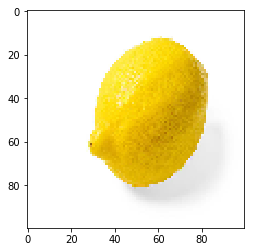

testing image============== 68
Lemon
I am 100.00% sure


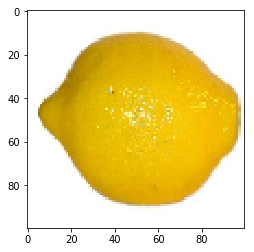

testing image============== 69
Lychee
I am 100.00% sure


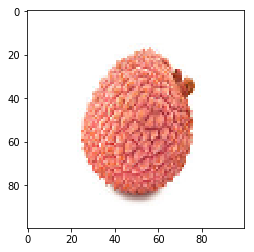

testing image============== 70
Lychee
I am 100.00% sure


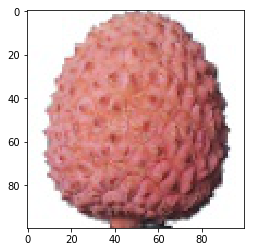

testing image============== 71
Lychee
I am 100.00% sure


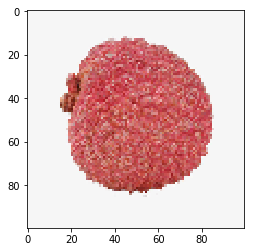

testing image============== 72
Lychee
I am 96.94% sure


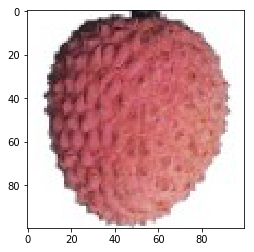

testing image============== 73
Lychee
I am 100.00% sure


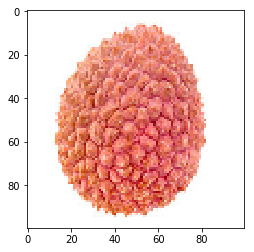

testing image============== 74
apple_red
I am 9.17% sure


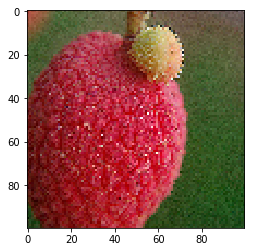

testing image============== 75
Lychee
I am 99.99% sure


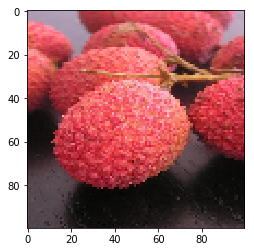

testing image============== 76
Lychee
I am 100.00% sure


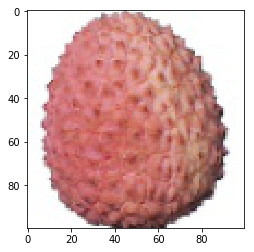

testing image============== 77
Lychee
I am 53.56% sure


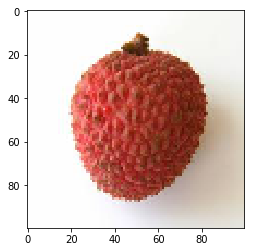

testing image============== 78
Lychee
I am 100.00% sure


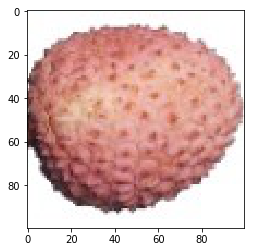

testing image============== 79
Orange
I am 99.57% sure


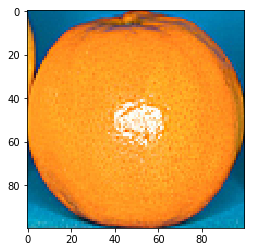

testing image============== 80
Orange
I am 3.44% sure


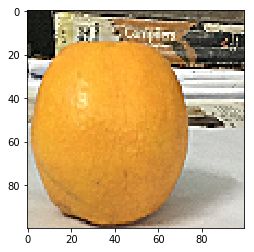

testing image============== 81
date
I am 12.03% sure


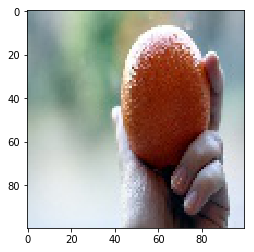

testing image============== 82
Orange
I am 99.99% sure


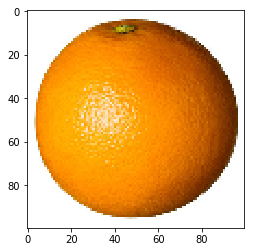

testing image============== 83
Orange
I am 96.14% sure


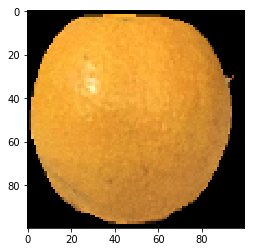

testing image============== 84
Lemon
I am 17.77% sure


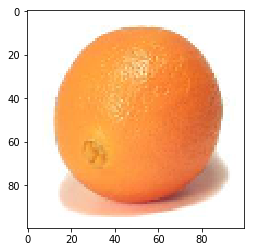

testing image============== 85
Lemon
I am 66.80% sure


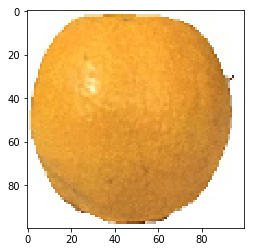

testing image============== 86
Lemon
I am 6.10% sure


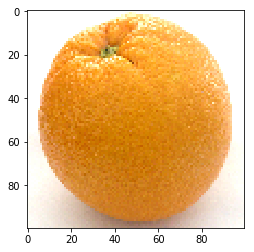

testing image============== 87
Orange
I am 3.35% sure


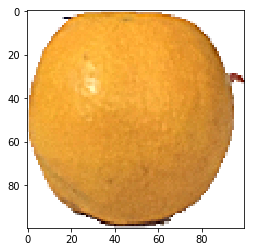

testing image============== 88
Orange
I am 100.00% sure


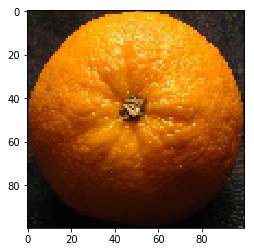

testing image============== 89
Banana
I am 96.40% sure


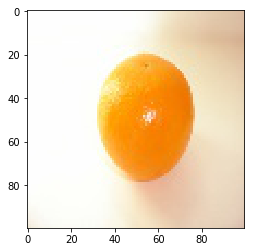

testing image============== 90
Banana
I am 9.41% sure


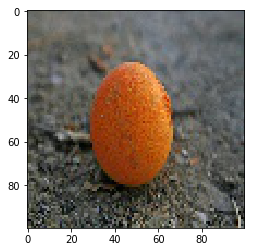

testing image============== 91
Orange
I am 93.22% sure


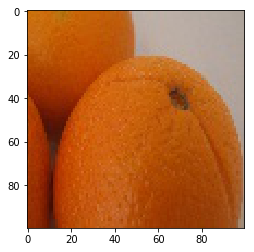

testing image============== 92
Lemon
I am 99.59% sure


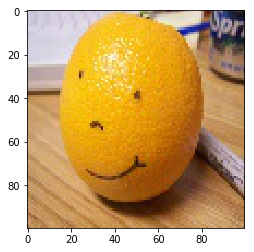

<Figure size 432x288 with 0 Axes>

In [47]:
for i in range(0,93):
    print("testing image==============",i )
    ind = np.argmax(predictions[i])
    #if ((predictions[i][ind])*100) < 1:
        #plt.imshow(test[i].T)
        #plt.show()
        #continue
    #else:     
    if ind ==0:
        print("graph")
    elif ind ==1:
        print("apple_red")
    elif ind ==2:
        print("apple_green")
    elif ind ==3:
        print("Banana")
    elif ind ==4:
        print("Orange")  
    elif ind ==5:
        print("date")  
    elif ind ==6:
        print("Lemon")  
    elif ind ==7:
        print("Lychee")
    elif ind ==8:
        print("Other")     
    print("============================================================================")
    print('I am {:.2%} sure'.format(predictions[i][ind]))


    plt.imshow(test[i].T)
    plt.show()
    plt.savefig('five.png')     

In [48]:
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

acc: 100.00%


In [49]:
print(model.metrics_names)

['loss', 'acc', 'f1_score']


In [50]:
print("%s: %.2f%%" % (model.metrics_names[2], score[2]*100))

f1_score: 93.47%


In [51]:
print('\nTest result: %.3f loss: %.3f f1_score: %.3f' % (score[1]*100,score[0], score[2]))


Test result: 100.000 loss: 0.000 f1_score: 0.935


In [52]:
from sklearn.metrics import precision_recall_fscore_support as score
tue=[2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,3,3,3,3,3,3,3,3,3,3,5,5,5,5,5,5,5,5,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,7,7,7,4,4,4,4,4,4,4,4,4,4,4,4,4,4]
prds= [2,3,3,5,3,2,2,3,2,0,0,1,1,0,7,7,1,1,7,5,7,1,5,1,3,3,3,3,3,3,3,3,3,3,7,5,5,5,5,5,7,5,3,5,5,1,1,7,0,0,5,0,7,3,1,5,7,0,7,0,0,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,7,7,7,4,4,5,4,4,6,6,6,4,4,3,3,4,6]
target_names = ['graph','apple_red', 'apple_green', 'banana','orange', 'date', 'lemon', 'lychee']
from sklearn.metrics import classification_report
print(classification_report(tue, prds, target_names=target_names))

             precision    recall  f1-score   support

      graph       0.67      0.35      0.46        17
  apple_red       0.67      0.40      0.50        15
apple_green       1.00      0.44      0.62         9
     banana       0.56      1.00      0.71        10
     orange       1.00      0.50      0.67        14
       date       0.50      0.70      0.58        10
      lemon       0.67      1.00      0.80         8
     lychee       0.50      1.00      0.67        10

avg / total       0.70      0.62      0.60        93



In [52]:
print(labels)

[0, 6, 1, 0, 3, 2, 7, 6, 0, 6, 4, 2, 1, 2, 0, 2, 5, 5, 0, 3, 3, 3, 2, 3, 1, 1, 6, 7, 6, 4, 1, 1, 4, 3, 4, 3, 3, 3, 4, 1, 0, 4, 7, 5, 1, 3, 2, 6, 4, 1, 7, 5, 6, 4, 0, 6, 5, 4, 6, 2, 2, 0, 2, 4, 0, 6, 1, 0, 5, 4, 6, 1, 6, 5, 4, 2, 1, 3, 6, 5, 1, 2, 0, 5, 3, 4, 4, 1, 5, 6, 7, 5, 7, 5, 6, 1, 5, 7, 0, 1, 5, 7, 3, 2, 5, 2, 3, 2, 5, 3, 7, 2, 1, 1, 1, 6, 5, 0, 5, 2, 4, 0, 3, 3, 7, 5, 4, 6, 2, 4, 7, 1, 5, 5, 0, 1, 3, 2, 5, 5, 0, 0, 1, 3, 6, 3, 3, 7, 4, 5, 5, 3, 0, 2, 4, 0, 7, 7, 2, 6, 4, 1, 5, 0, 1, 7, 1, 1, 4, 6, 4, 6, 6, 0, 3, 6, 5, 3, 2, 3, 5, 1, 0, 5, 7, 1, 7, 2, 2, 1, 7, 5, 5, 1, 4, 3, 2, 1, 4, 2, 2, 0, 5, 3, 1, 5, 6, 6, 7, 2, 1, 1, 4, 1, 5, 2, 2, 4, 4, 3, 2, 5, 0, 1, 4, 3, 7, 3, 4, 2, 0, 1, 3, 3, 3, 2, 4, 7, 7, 3, 5, 4, 0, 4, 7, 6, 5, 7, 4, 4, 6, 6, 6, 6, 2, 3, 3, 3, 3, 0, 4, 2, 5, 5, 3, 6, 1, 3, 3, 3, 4, 5, 6, 1, 1, 4, 7, 3, 3, 6, 3, 6, 7, 1, 0, 4, 1, 7, 2, 4, 0, 7, 4, 7, 6, 1, 4, 0, 0, 0, 3, 1, 0, 0, 5, 4, 1, 6, 0, 5, 4, 1, 4, 5, 7, 3, 0, 3, 4, 5, 4, 7, 1, 6, 4, 1, 2, 7, 2, 4, 7, 0, 7, 

In [53]:
print(format(predictions[i][ind]))

0.022949330508708954


In [54]:
print(i)
print(ind)

92
5
